In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import PIL as pl
from PIL import Image
import seaborn

### **Geological dataset simulation:**

In [5]:
elevation = np.zeros((3,3))
slope = np.zeros((3,3))
vegetation = np.zeros((3,3))
built = np.zeros((3,3))
precipitation = np.zeros((3,3))
river_prox_index = np.zeros((3,3))
volc_teton_prox_index = np.zeros((3,3))
lithology = np.zeros((3,3))
flagger = np.zeros((3,3))

slide_sus = np.zeros((3,3))

for i in range(3):
  for j in range(3):
    elevation[i][j] = random.random()
    slope[i][j] = random.random()
    vegetation[i][j] = random.random()
    built[i][j] = random.random()
    precipitation[i][j] = random.random()
    flagger[i][j] = np.random.randint(2,size=1)

    slide_sus[i][j] = random.random() 
    + 0.6 * flagger[i,j] 
    + 0.4 * precipitation[i][j] 
    + 0.4 * volc_teton_prox_index[i][j] 
    + 0.4 * river_prox_index [i][j] 
    + 0.3 * built[i][j] 
    + 0.2 * slope[i][j] 
    + 0.1 * vegetation [i][j] 
    + 0.1 * elevation [i][j]

slide_sus = slide_sus/np.max(np.max(slide_sus + 0.001))
print(slide_sus)

[[0.65181765 0.26854748 0.68118186]
 [0.55252422 0.7662274  0.7264028 ]
 [0.77599937 0.99899519 0.95165664]]


In [26]:
size = 25
im_elev = Image.fromarray(elevation).resize((size,size))
im_slp = Image.fromarray(slope).resize((size,size))
im_veg = Image.fromarray(vegetation).resize((size,size))
im_built = Image.fromarray(built).resize((size,size))
im_prec = Image.fromarray(precipitation).resize((size,size))
im_riv = Image.fromarray(river_prox_index).resize((size,size))
im_volc = Image.fromarray(volc_teton_prox_index).resize((size,size))
im_litho = Image.fromarray(lithology).resize((size,size))
im_flg = Image.fromarray(flagger).resize((size,size))

im_slide_sus = Image.fromarray(slide_sus).resize((size,size))

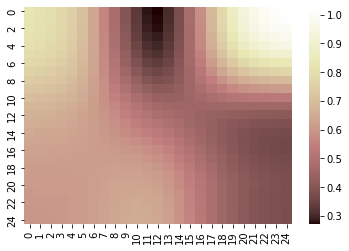

In [27]:
seaborn.heatmap(im_elev, cmap='pink')

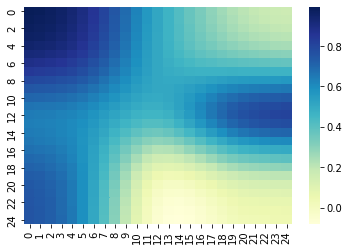

In [28]:
seaborn.heatmap(im_prec, cmap='YlGnBu')

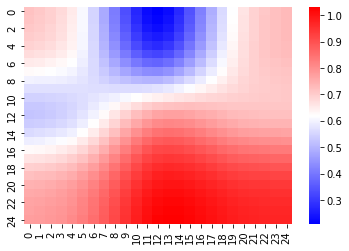

In [29]:
seaborn.heatmap(im_slide_sus, cmap='bwr')

### **Image conversion to numpy array and time evolution**


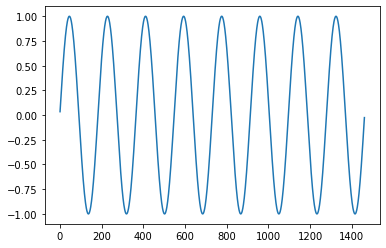

In [25]:
# assuming the 4 year 
days = np.linspace(1,4*365, 4*365) 
time_evolution = np.sin(4*3.14*days/365)
plt.plot(days, time_evolution)

In [24]:
elev_np = np.asarray(im_elev)
slp_np = np.asarray(im_slp)
veg_np = np.asarray(im_veg)
built_np = np.asarray(im_built)
prec_np = np.asarray(im_prec)
riv_np = np.asarray(im_riv)
volc_np = np.asarray(im_volc)
litho_t = np.asarray(im_litho)
flg_np = np.asarray(im_flg)
slide_np = np.asarray(im_slide_sus)

In [31]:
def Time_evolution simulator():
  '''This function will be completed later'''



# ***LSTM Predictive Model:***


In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [16]:
lookback = 1
final_prediction_dimension = 1
LSTM_model = Sequential([
                         layers.LSTM(64, input_shape=(10, lookback)),
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Flatten(),
                         layers.Dense(128, activation='relu'),
                         layers.Flatten(),
                         layers.Dense(final_prediction_dimension, activation = 'sigmoid')
                         ])

LSTM_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="Adam",
    metrics=["accuracy"],
)

LSTM_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 64)                16896     
_________________________________________________________________
flatten_13 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
flatten_14 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
flatten_15 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                